In [2]:
from torchvision import utils
from basic_fcn import *
#from custom import *
from dataloader import *
from utils import *
import torchvision
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import time
import math
from tqdm import tqdm
import gc
import os
import pickle

In [3]:
#w = torch.load('./weights_dice_save_22/epoch-22')
test_dataset = CityScapesDataset(csv_file='test.csv', transforms =None)

In [4]:
fcn_model_test = FCN(n_class=34)
fcn_model_test = torch.load('./weights_dice_save_22/epoch-22').module

In [5]:
img, target, label = test_dataset.__getitem__(0)
img = img.unsqueeze(0) 
img = img.to('cuda')
op = fcn_model_test(img)
softmax = nn.Softmax(dim = 1)
prediction = softmax(op)

In [6]:
from dataloader import labels_classes

In [7]:
map = torch.zeros([3, 1024, 2048])
pred = torch.argmax(prediction, dim=1)
for i in range(0, 1024):
    for j in range(0, 2048):
        col = pred[0, i, j]
        map[0, i, j] = labels_classes[col][7][0]
        map[1, i, j] = labels_classes[col][7][1]
        map[2, i, j] = labels_classes[col][7][2]

In [8]:
col.to('cpu')
map.to('cpu')

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [14]:
ar_map = np.asarray(map).astype(int)
print(ar_map.shape)

(3, 1024, 2048)


(3, 1024, 2048)
(2048, 1024, 3)
(1024, 2048, 3)


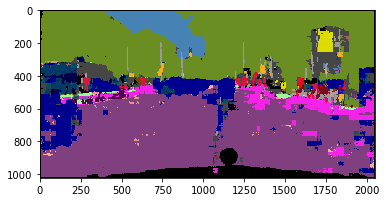

In [15]:
import numpy as np
from dataloader import *
from PIL import Image
import matplotlib.pyplot as plt
print(ar_map.shape)
ar_map = np.swapaxes(ar_map, 0, 2)
print(ar_map.shape)
ar_map = np.swapaxes(ar_map, 0, 1)
print(ar_map.shape)
plt.imshow(ar_map)